In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [8]:
size=200
ez=np.zeros(size)
hy=np.zeros(size)
#ez[50]=1

In [9]:
er= lambda x: 1+0.5*(x%2)*(int(x/50))
er2=lambda x: 1+8*(int(x/100))
# for i in range(100):
#     print(er(i))

In [11]:

def fieldupdate3(T=10,size=100,E=ez,H=hy):
    imp0=377
    E_history=[]
    H_history=[]
    test=[]
    for t in range(T):
        H[size-1]=H[size-2]
        for i in range(len(E)-1):
            H[i]=H[i]+(E[i+1]-E[i])/imp0 
        if t<100:
            H[49]-=math.sin(0.1*t)/imp0
        #H[49]-=math.sin(0.1*t)
        #E[size-1]=E[size-2]
        E[0]=E[1]
        for j in range(len(E)-1):
            E[j+1]=E[j+1]+(H[j+1]-H[j])*imp0/er(j+1)
        
#         if t<100:
#             E[25]=math.sin(0.1*t)
#         else:
#             E[25]=0
       # E[25]=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
        if t<100:
            E[50]=E[50]+math.sin(0.1*t)
        #E[50]=E[50]+math.sin(0.1*t)/100
        test.append(E[int(0.5*size)])
        E_history.append(E.copy())
        H_history.append(H.copy())
    with open("E field history.txt", 'w') as f:
        for member in E_history:
            f.write(str(member) + '\n')
    with open("H field history.txt", 'w') as f:
        for member in H_history:
            f.write(str(member) + '\n')
    E_history=np.array(E_history)
    return E,H,test, E_history



In [12]:
T=500
X=[]
Y=[]
for i in range(T):
    for j in range(size):
        X.append(i)
        Y.append(j)
X=np.array(X)
Y=np.array(Y)
#print(test)

In [13]:
EZ,HY,test,E_history=fieldupdate3(T,size,ez,hy)
print(type(E_history))
E_new=E_history.copy().reshape(-1)


<class 'numpy.ndarray'>


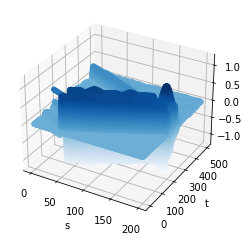

In [14]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = E_new
xdata = Y
ydata = X
plt.xlabel('s')
plt.ylabel('t')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');


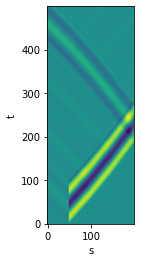

In [15]:
plt.xlabel('s')
plt.ylabel('t')
plt.imshow(E_history,origin='lower')

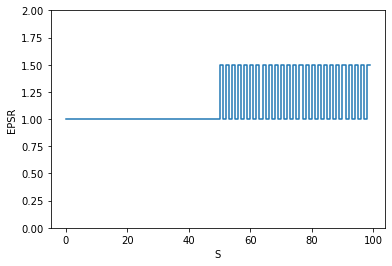

In [21]:
x=[0]*100
y=[0]*100
for i in range(100):
    x[i]=i
    y[i]=er(i)


plt.xlabel('S')
plt.ylabel('EPSR')
plt.ylim(0,2)
plt.step(x,y)

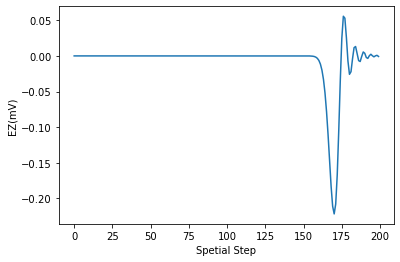

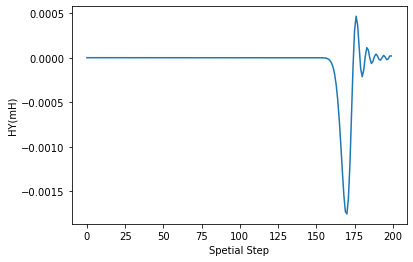

In [79]:

#plot for final states
plt.plot(EZ)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()
plt.plot(HY)
plt.xlabel('Spetial Step')
plt.ylabel('HY(mH)')
#plt.ylabel('some numbers')
plt.show()# 

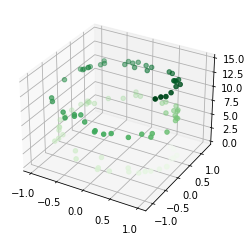

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.zeros(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

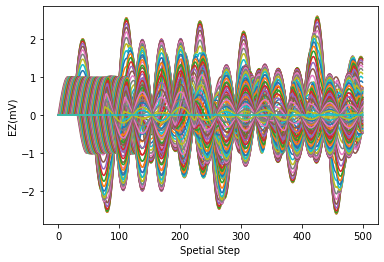

In [11]:
plt.plot(E_history)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()